/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
<ipython-input-35-89b15ce1cdb7>:18: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_matrix = np.cov(inlist[i], rowvar=False, bias=True)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


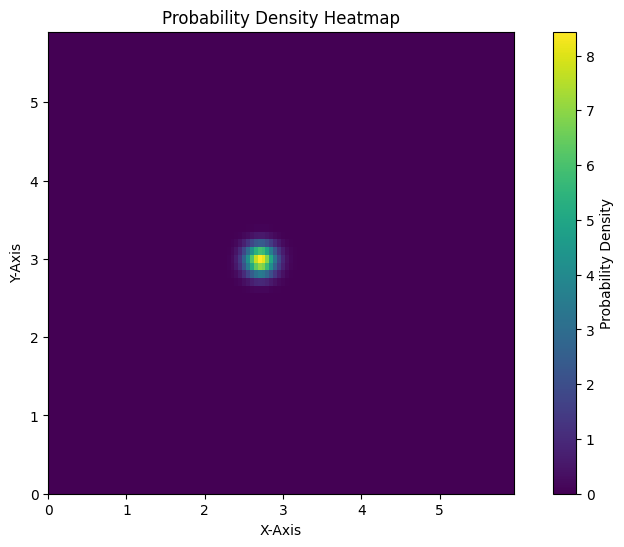

In [35]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

def pdfnvar(x, m, K):
    pdf = multivariate_normal.pdf(x, mean=m, cov=K)
    return pdf

def mymix(x, inlist):
    ng = len(inlist)
    klist = []
    mlist = []
    pglist = []
    nglist = []
    n = inlist[0].shape[1]

    for i in range(ng):
        cov_matrix = np.cov(inlist[i], rowvar=False, bias=True)
        if not np.any(np.isnan(cov_matrix)) and not np.any(np.isinf(cov_matrix)):
            klist.append(cov_matrix)
            mlist.append(np.mean(inlist[i], axis=0))
            nglist.append(inlist[i].shape[0])
        else:
            # Handle singular or ill-conditioned covariance matrices by using a default value
            klist.append(np.identity(n))
            mlist.append(np.zeros(n))
            nglist.append(0)

    N = sum(nglist)

    for i in range(ng):
        if nglist[i] > 0:
            pglist.append(nglist[i] / N)
        else:
            pglist.append(0)

    Px = 0

    for i in range(ng):
        if nglist[i] > 0:
            pdf_value = pdfnvar(x, mlist[i], klist[i])
            if not np.isnan(pdf_value) and not np.isinf(pdf_value):
                Px += pglist[i] * pdf_value

    return Px

s1 = 0.5
s2 = 0.5
s3 = 0.5
s4 = 0.5

nc = 100

xc1 = np.random.normal(size=(nc, 2)) * s1 + np.array([2, 3])
xc2 = np.random.normal(size=(nc, 2)) * s2 + np.array([4, 3])
xc3 = np.random.normal(size=(nc, 2)) * s3 + np.array([3, 4])
xc4 = np.random.normal(size=(nc, 2)) * s4 + np.array([3, 2])
xc = np.vstack((xc1, xc2, xc3, xc4))

k = 6

# Assuming you have a function 'mykmedias' that returns 'retlist'

xclusters = [[] for _ in range(k)]

for i in range(k):
    ici = np.where(retlist[1] == i + 1)[0]
    xclusters[i] = xc[ici, :]

seqi = np.arange(0, 6, 0.1)
seqj = np.arange(0, 6, 0.05)

M = np.empty((len(seqi), len(seqj)))  # Initialize with empty array

ci = 0

for i in seqi:
    ci += 1
    cj = 0
    for j in seqj:
        cj += 1
        x = np.array([i, j])
        pdf_value = mymix(x, xclusters)
        if not np.isnan(pdf_value) and not np.isinf(pdf_value):
            M[ci - 1, cj - 1] = pdf_value
        else:
            M[ci - 1, cj - 1] = 0.0  # Set to a default value in case of NaN or inf

# Now, M contains the values similar to the R code

plt.figure(figsize=(10, 6))
plt.imshow(M, origin='lower', extent=[seqj[0], seqj[-1], seqi[0], seqi[-1]], cmap='viridis')
plt.colorbar(label='Probability Density')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Probability Density Heatmap')
plt.show()


In [33]:
import numpy as np

def mymix(x, inlist):

  """Calculates the mixture probability of a data point x given a list of component distributions inlist.

  Args:
    x: A 2D numpy array representing the data point.
    inlist: A list of 2D numpy arrays representing the component distributions.

  Returns:
    A float representing the mixture probability of x.
  """

  if len(inlist) == 0:
    raise ValueError("The inlist tuple must contain at least one component distribution.")

  n = inlist[0].shape[1]

  def pdfnvar(x, m, K, n):
    """Calculates the probability density function of a multivariate normal distribution.

    Args:
      x: A 2D numpy array representing the data point.
      m: A 1D numpy array representing the mean of the distribution.
      K: A 2D numpy array representing the covariance matrix of the distribution.
      n: An integer representing the number of dimensions of the distribution.

    Returns:
      A float representing the probability density function of x.
    """

    det_K = np.linalg.det(K)
    inv_K = np.linalg.inv(K)
    mahalanobis_distance = np.dot((x - m).T, np.dot(inv_K, (x - m)))
    return (1 / np.sqrt((2 * np.pi)**n * det_K)) * np.exp(-0.5 * mahalanobis_distance)

  ng = len(inlist)
  klist = []
  mlist = []
  pglist = []
  nglist = []

  for i in range(ng):
    klist.append(np.cov(inlist[i]))
    mlist.append(np.mean(inlist[i], axis=0))
    nglist.append(inlist[i].shape[0])

  N = 0
  for i in range(ng):
    N += nglist[i]

  for i in range(ng):
    pglist.append(nglist[i] / N)

  Px = 0
  for i in range(ng):
    Px += pglist[i] * pdfnvar(x, mlist[i], klist[i], n)

  return Px

################################

s1 = 0.5
s2 = 0.5
s3 = 0.5
s4 = 0.5

nc = 100

xc1 = np.random.normal(0, s1, size=(nc, 2)) + np.array([2, 3]).reshape((1, 2))
xc2 = np.random.normal(0, s2, size=(nc, 2)) + np.array([4, 3]).reshape((1, 2))
xc3 = np.random.normal(0, s3, size=(nc, 2)) + np.array([3, 4]).reshape((1, 2))
xc4 = np.random.normal(0, s4, size=(nc, 2)) + np.array([3, 2]).reshape((1, 2))

xc = np.vstack((xc1, xc2, xc3, xc4))

k = 6

retlist = mymix(xc, xc)

xclusters = []
for i in range(k):
  ici = np.where(retlist[2] == i)[0]
  xclusters.append(xc[ici, :])

####################

seqi = np.arange(0, 6, 0.1)
seqj = np.arange(0, 6, 0.05)

M = np.ones((len(seqi), len(seqj)))

ci = 0
for i in seqi:
  ci += 1
  cj = 0
  for j in seqj:
    cj += 1
    x = np.array([i, j])
    M[ci, cj] = mymix(x, xclusters)



IndexError: ignored